Selecciona tu archivo .csv ...


Saving itemsEjec.csv to itemsEjec.csv

✅ Archivo cargado: itemsEjec.csv
Primeras filas:
   ID                     DescripcionItem  CantidadItem        Subregion  \
0   0  Canalizacion tuberia en zona verde       2113.00          ORIENTE   
1   1      Canalizacion tuberia en cuneta        259.28          ORIENTE   
2   2   Canalizacion tuberia en destapado        246.00  VALLE DE ABURRA   
3   3  Canalizacion tuberia en zona verde        208.00  VALLE DE ABURRA   
4   4  Canalizacion tuberia en zona verde        118.00         SUROESTE   

     Municipio  MpCode  Latitud_Y  Longitud_X  tierras  areaTierras    roca  \
0    EL RETIRO    5607   6.083494  -75.511603  316.950            0   0.000   
1    EL RETIRO    5607   6.083494  -75.511603   25.928            0  12.964   
2     MEDELLIN    5001   6.228803  -75.603341   18.450            1  24.600   
3     MEDELLIN    5001   6.228803  -75.603341   31.200            1   0.000   
4  PUEBLORRICO    5576   5.793895  -75.842994   17.700      

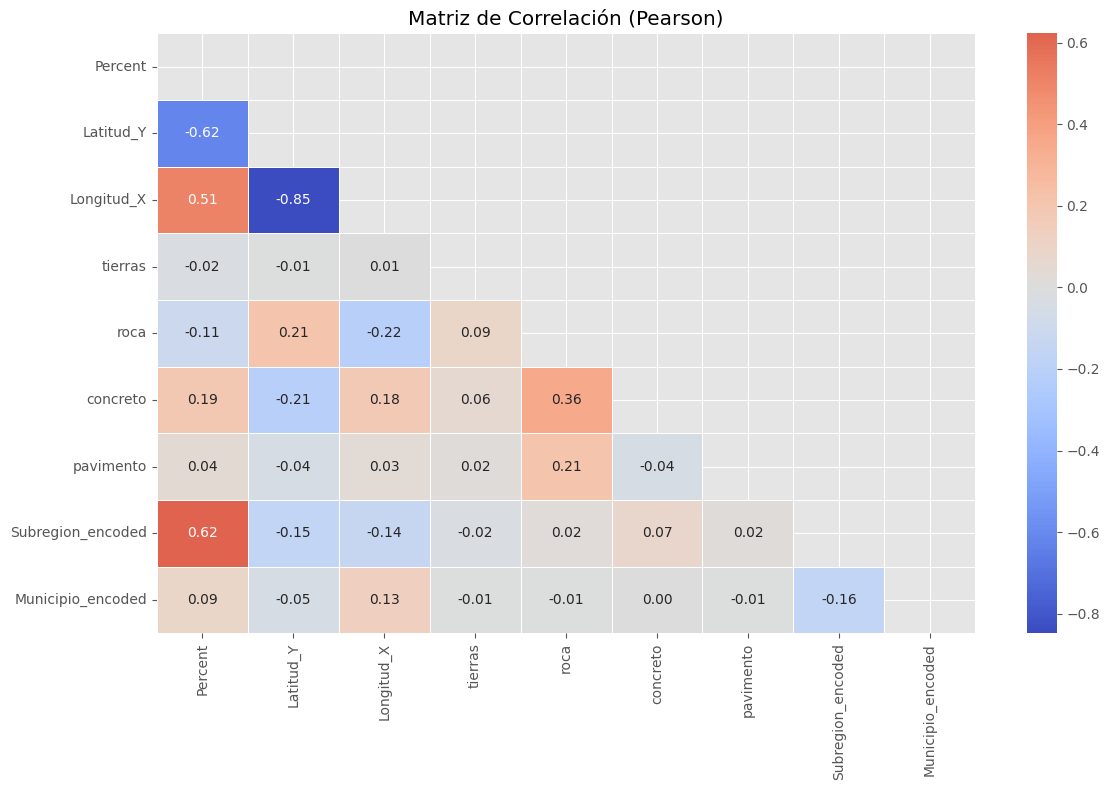


[Info] Shapes:
X_train: (8671, 12) X_test: (2891, 12)

Mejores hiperparámetros (Regresión): {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mejores hiperparámetros (Clasificación): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

[Evaluación REGRESIÓN]
- MAE  (test): 0.044
- RMSE (test): 0.719
- R²   (test): 1.000
- CV RMSE (mean±std): 0.501 ± 0.145
- CV R²   (mean±std): 1.000 ± 0.000

[Evaluación CLASIFICACIÓN]
              precision    recall  f1-score   support

        Bajo       1.00      1.00      1.00      1457
        Alto       1.00      1.00      1.00      1434

    accuracy                           1.00      2891
   macro avg       1.00      1.00      1.00      2891
weighted avg       1.00      1.00      1.00      2891



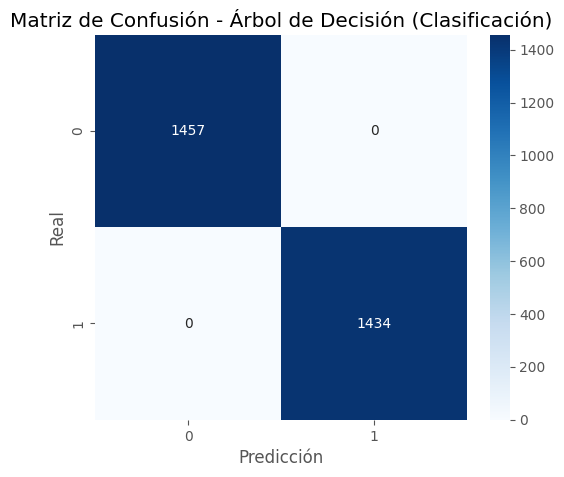

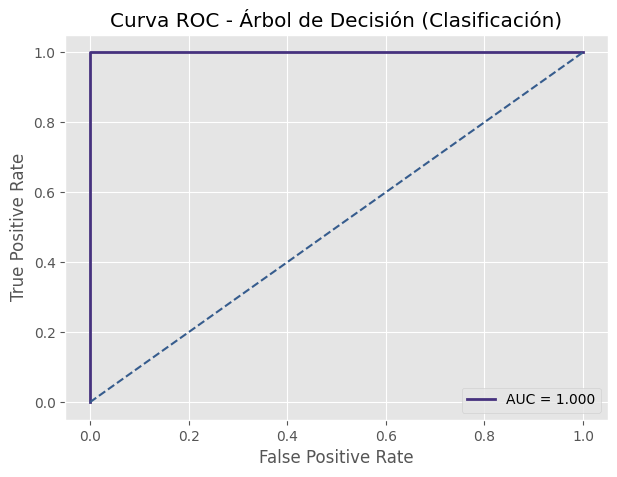


Importancia de variables - Regresión (% Aprovechamiento)
             Variable   Importancia
6         areaTierras  8.935494e-01
8        areaConcreto  8.473358e-02
3                roca  1.981598e-02
9       areaPavimento  1.472584e-03
5           pavimento  2.483567e-04
4            concreto  1.128998e-04
2             tierras  5.615724e-05
1          Longitud_X  1.100650e-05
0           Latitud_Y  1.786106e-17
7            areaRoca  0.000000e+00
10  Subregion_encoded  0.000000e+00
11  Municipio_encoded  0.000000e+00


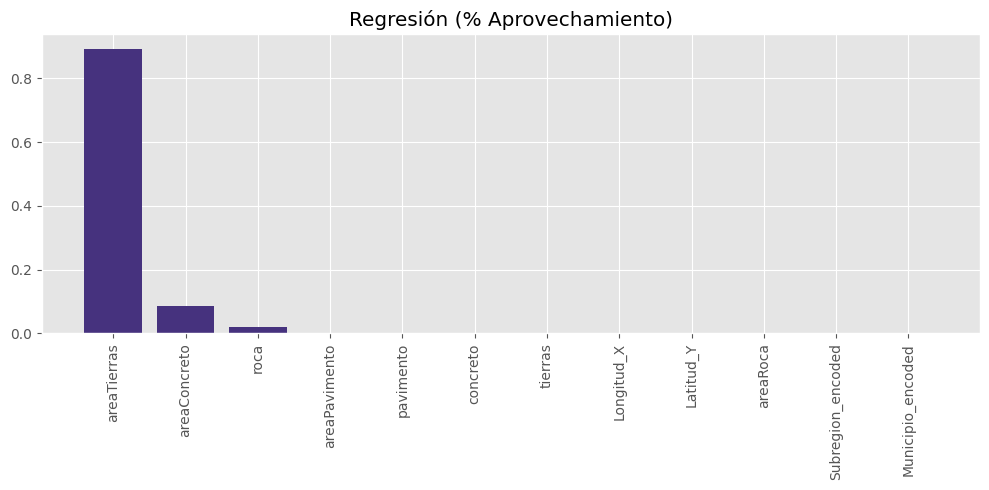


Importancia de variables - Clasificación (Alto/Bajo)
             Variable  Importancia
6         areaTierras     0.816773
8        areaConcreto     0.164268
3                roca     0.018960
0           Latitud_Y     0.000000
2             tierras     0.000000
1          Longitud_X     0.000000
5           pavimento     0.000000
4            concreto     0.000000
7            areaRoca     0.000000
9       areaPavimento     0.000000
10  Subregion_encoded     0.000000
11  Municipio_encoded     0.000000


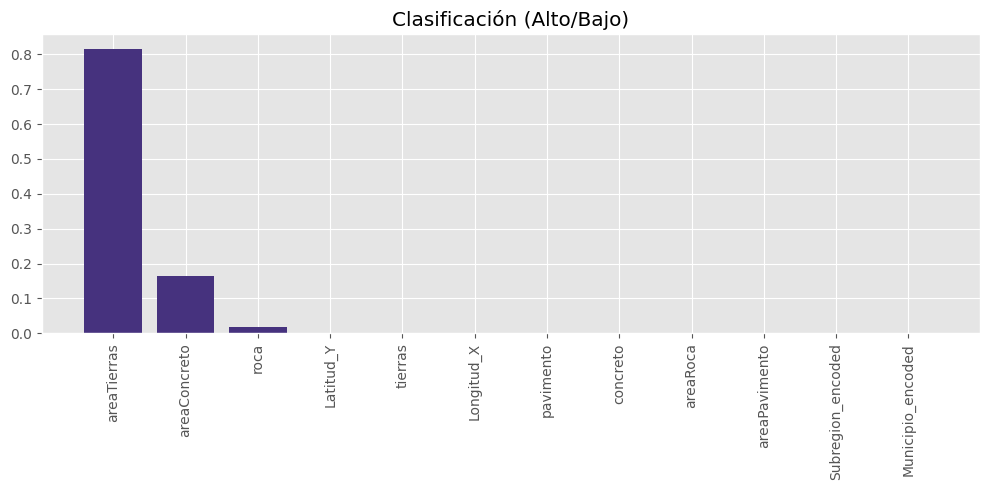

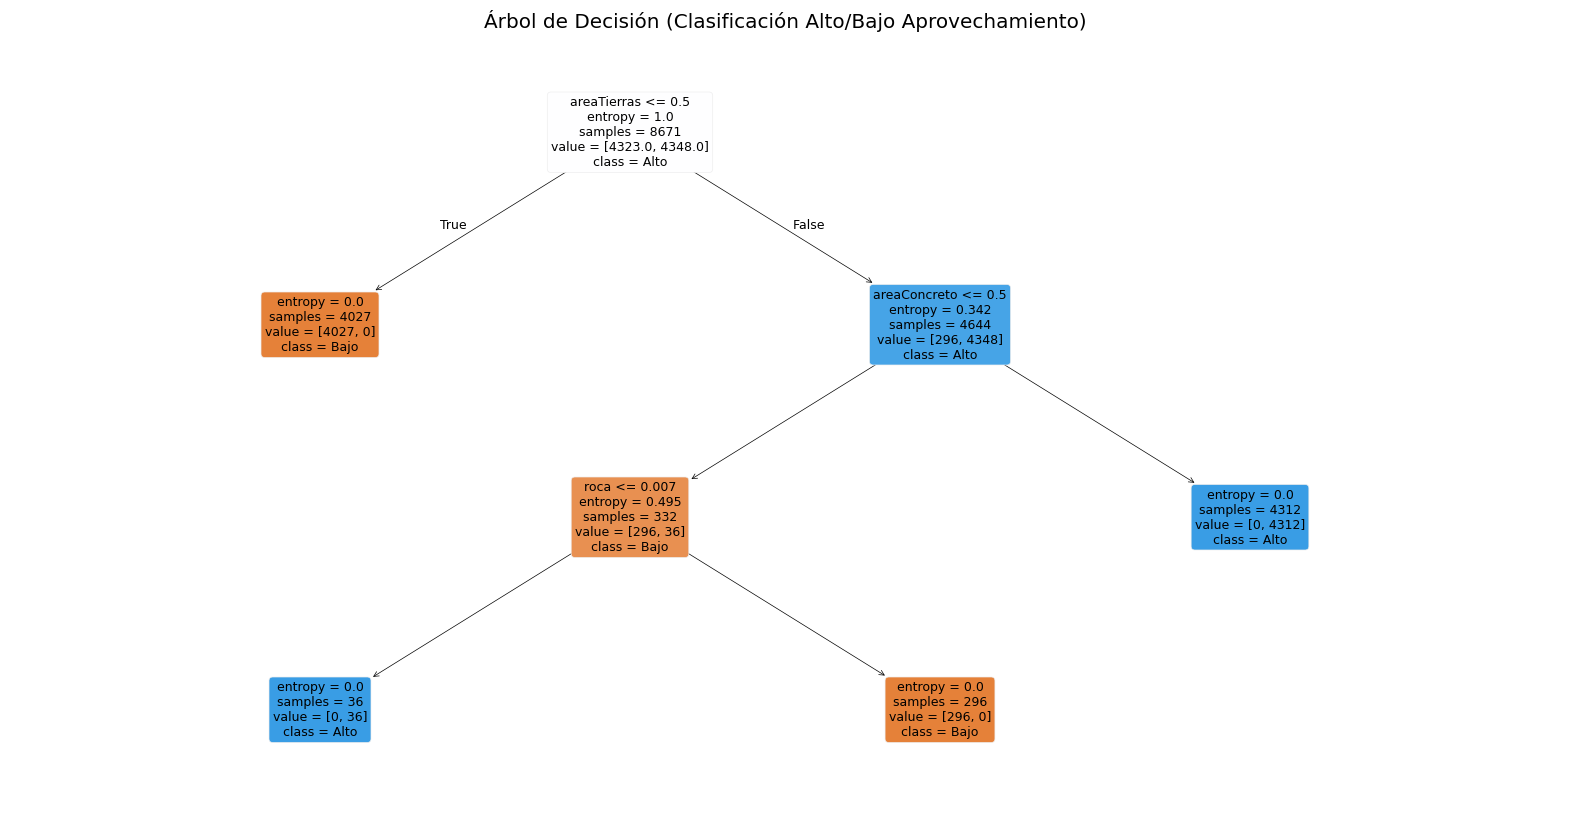


🌍 Mapa Folium generado: 'mapa_aprovechamiento.html' (Descárgalo desde el panel de archivos)

--- PREDICCIÓN NUEVO PROYECTO (EJEMPLO) ---
{'Percent_predicho': 100.0, 'Clasificacion': 'Alto', 'Prob_Alto': 1.0}

================= CONCLUSIONES =================

1) Calidad del modelo de Regresión (% Aprovechamiento):
   - MAE  (test): 0.04 puntos porcentuales
   - RMSE (test): 0.72 puntos porcentuales
   - R²   (test): 1.00
   - CV RMSE:     0.50 ± 0.14
   - CV R²:       1.00 ± 0.00
   Interpretación: valores más bajos de MAE/RMSE y R² cercano a 1 indican mejor ajuste.

2) Calidad del modelo de Clasificación (Alto vs Bajo):
   - F1-score Alto: 1.00
   - F1-score Bajo: 1.00
   - Se reportó AUC en la curva ROC (ver gráfica).
   Interpretación: F1 balancea precisión y exhaustividad; AUC refleja discriminación global.

3) Variables más influyentes según los árboles:
   - Regresión: areaTierras, areaConcreto, roca, areaPavimento, pavimento
   - Clasificación: areaTierras, areaConcreto, roca, L

In [ ]:
# ================================================
# PREDICCIÓN DE % APROVECHAMIENTO CON ÁRBOLES DE DECISIÓN
# ================================================
# Autor: (tu nombre)
# Objetivo:
#   - Modelar el porcentaje de aprovechamiento (regresión)
#   - Clasificar alto/bajo aprovechamiento (clasificación)
#   - Integrar zona (Latitud/Longitud, Subregión, Municipio)
#   - Explicar con métricas, gráficos, árbol e importancia de variables
#   - Exportar un mapa Folium
#
# Notas:
#   - Diseñado para Google Colab (usa selector de archivo)
#   - Si el CSV no trae la columna 'Percent', se calcula automáticamente
#     a partir de: tierras/roca/concreto/pavimento y sus banderas area*
# ================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    classification_report, confusion_matrix, roc_curve, auc
)

import folium

# --------- Configuración estética ----------
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
sns.set_palette("viridis")

# ====================================================
# [PASO 1] CARGA DEL CSV (Selector de archivo en Colab)
# ====================================================
print("Selecciona tu archivo .csv ...")
uploaded = files.upload()
CSV_NAME = list(uploaded.keys())[0]
df = pd.read_csv(CSV_NAME)
print(f"\n✅ Archivo cargado: {CSV_NAME}")
print("Primeras filas:")
print(df.head())

# ====================================================
# [PASO 2] ESTANDARIZACIÓN DE COLUMNAS ESPERADAS
# ====================================================
# Intentamos detectar nombres de columnas relevantes con tolerancia a variaciones minúsculas/mayúsculas.
def col(df, name):
    # devuelve el nombre real de la columna que coincide case-insensitive
    for c in df.columns:
        if c.strip().lower() == name.strip().lower():
            return c
    return None

expected_cols = [
    "Subregion","Municipio","MpCode","Latitud_Y","Longitud_X",
    "tierras","areaTierras","roca","areaRoca","concreto","areaConcreto","pavimento","areaPavimento","Percent"
]

# Mapea nombres presentes reales
colmap = {name: col(df, name) for name in expected_cols}

# Verificación mínima obligatoria para cálculo de Percent si no existe
needed_for_percent = ["tierras","areaTierras","roca","areaRoca","concreto","areaConcreto","pavimento","areaPavimento"]
missing = [n for n in needed_for_percent if colmap[n] is None]
if colmap["Percent"] is None and missing:
    raise ValueError(
        f"No existe la columna 'Percent' y faltan columnas para calcularlo: {missing}. "
        "Asegúrate de que el CSV tenga esas columnas."
    )

# ====================================================
# [PASO 3] CÁLCULO / VALIDACIÓN DE 'Percent'
# ====================================================
def calcular_percent_fila(row):
    # Suma de toneladas por material
    total = 0.0
    aprove = 0.0

    # Para cada material: si su bandera area* == 1 => cuenta en aprovechamiento
    for mat, flag in [
        (colmap["tierras"], colmap["areaTierras"]),
        (colmap["roca"], colmap["areaRoca"]),
        (colmap["concreto"], colmap["areaConcreto"]),
        (colmap["pavimento"], colmap["areaPavimento"])
    ]:
        t = float(row.get(mat, 0.0) or 0.0)
        a = row.get(flag, 0)
        total += t
        if int(a) == 1:
            aprove += t
    if total <= 0:
        return 0.0
    return 100.0 * aprove / total

if colmap["Percent"] is None:
    print("\n[Info] No se encontró 'Percent' en el CSV. Se calculará a partir de banderas area* ...")
    df["Percent"] = df.apply(calcular_percent_fila, axis=1)
    colmap["Percent"] = "Percent"

# Limpieza básica de NaN/inf en numéricos
numeric_candidates = [
    colmap.get("Latitud_Y"), colmap.get("Longitud_X"),
    colmap.get("tierras"), colmap.get("roca"),
    colmap.get("concreto"), colmap.get("pavimento"),
    "Percent"
]
numeric_candidates = [c for c in numeric_candidates if c in df.columns]
df[numeric_candidates] = df[numeric_candidates].replace([np.inf, -np.inf], np.nan)
df[numeric_candidates] = df[numeric_candidates].fillna(0.0)

# Vista rápida de 'Percent'
print("\nResumen de 'Percent':")
print(df["Percent"].describe())

# ====================================================
# [PASO 4] EDA ESENCIAL: CORRELACIÓN
# ====================================================
# Codificamos Subregión/Municipio para poder correlacionar (sin perder sus originales)
df["_Subregion"] = df[colmap["Subregion"]] if colmap["Subregion"] in df else "DESCONOCIDA"
df["_Municipio"] = df[colmap["Municipio"]] if colmap["Municipio"] in df else "DESCONOCIDO"

le_sub = LabelEncoder()
le_mun = LabelEncoder()
df["Subregion_encoded"] = le_sub.fit_transform(df["_Subregion"])
df["Municipio_encoded"] = le_mun.fit_transform(df["_Municipio"])

corr_cols = [
    "Percent",
    "Latitud_Y" if colmap["Latitud_Y"] in df else None,
    "Longitud_X" if colmap["Longitud_X"] in df else None,
    colmap["tierras"], colmap["roca"], colmap["concreto"], colmap["pavimento"],
    "Subregion_encoded","Municipio_encoded"
]
corr_cols = [c for c in corr_cols if c in df.columns]
corr = df[corr_cols].corr(method="pearson")

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5,
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title("Matriz de Correlación (Pearson)")
plt.tight_layout()
plt.show()

# ====================================================
# [PASO 5] PREPARACIÓN DE FEATURES Y TARGETS
# ====================================================
# Features base
features = []

for key in ["Latitud_Y","Longitud_X","tierras","roca","concreto","pavimento",
            "areaTierras","areaRoca","areaConcreto","areaPavimento",
            "Subregion_encoded","Municipio_encoded"]:
    cname = colmap.get(key, key)  # usa mapeo si venía con otro nombre
    if cname in df.columns:
        features.append(cname)

X = df[features].copy()
y_reg = df["Percent"].astype(float)

# Objetivo de CLASIFICACIÓN: alto/bajo aprovechamiento respecto a la mediana
umbral = y_reg.median()
y_clf = (y_reg >= umbral).astype(int)

# Train/test split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=42
)
_, _, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.25, random_state=42
)

print("\n[Info] Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# ====================================================
# [PASO 6] BÚSQUEDA DE HIPERPARÁMETROS + ENTRENAMIENTO
# ====================================================
# --- Regressor ---
reg = DecisionTreeRegressor(random_state=42)
param_grid_reg = {
    "criterion": ["squared_error", "friedman_mse"],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}
gcv_reg = GridSearchCV(reg, param_grid_reg, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
gcv_reg.fit(X_train, y_train_reg)
best_reg = gcv_reg.best_estimator_

# --- Classifier ---
clf = DecisionTreeClassifier(random_state=42)
param_grid_clf = {
    "criterion": ["entropy", "gini"],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}
gcv_clf = GridSearchCV(clf, param_grid_clf, cv=5, scoring="f1", n_jobs=-1)
gcv_clf.fit(X_train, y_train_clf)
best_clf = gcv_clf.best_estimator_

print("\nMejores hiperparámetros (Regresión):", gcv_reg.best_params_)
print("Mejores hiperparámetros (Clasificación):", gcv_clf.best_params_)

# ====================================================
# [PASO 7] EVALUACIÓN (Test) + VALIDACIÓN CRUZADA
# ====================================================
# --- Regresión ---
y_pred_reg = best_reg.predict(X_test)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

# Cross-Validation (Regresión)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = -cross_val_score(best_reg, X, y_reg, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
cv_r2 = cross_val_score(best_reg, X, y_reg, cv=cv, scoring="r2", n_jobs=-1)

print("\n[Evaluación REGRESIÓN]")
print(f"- MAE  (test): {mae:.3f}")
print(f"- RMSE (test): {rmse:.3f}")
print(f"- R²   (test): {r2:.3f}")
print(f"- CV RMSE (mean±std): {cv_rmse.mean():.3f} ± {cv_rmse.std():.3f}")
print(f"- CV R²   (mean±std): {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")

# --- Clasificación ---
y_pred_clf = best_clf.predict(X_test)
print("\n[Evaluación CLASIFICACIÓN]")
print(classification_report(y_test_clf, y_pred_clf, target_names=["Bajo", "Alto"]))

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Árbol de Decisión (Clasificación)")
plt.ylabel("Real")
plt.xlabel("Predicción")
plt.show()

# Curva ROC / AUC
if hasattr(best_clf, "predict_proba"):
    y_scores = best_clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_clf, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Árbol de Decisión (Clasificación)")
    plt.legend()
    plt.show()

# ====================================================
# [PASO 8] IMPORTANCIA DE VARIABLES + VISUALIZACIÓN DEL ÁRBOL
# ====================================================
def plot_feature_importances(model, X, titulo):
    imp = pd.DataFrame({
        "Variable": X.columns,
        "Importancia": model.feature_importances_
    }).sort_values("Importancia", ascending=False)
    print("\nImportancia de variables -", titulo)
    print(imp)

    plt.figure(figsize=(10,5))
    plt.bar(imp["Variable"], imp["Importancia"])
    plt.xticks(rotation=90)
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

plot_feature_importances(best_reg, X_train, "Regresión (% Aprovechamiento)")
plot_feature_importances(best_clf, X_train, "Clasificación (Alto/Bajo)")

# --- Visualización del árbol (el de clasificación suele ser más corto e interpretable) ---
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=X_train.columns, class_names=["Bajo","Alto"], filled=True, rounded=True, fontsize=9)
plt.title("Árbol de Decisión (Clasificación Alto/Bajo Aprovechamiento)")
plt.show()

# ====================================================
# [PASO 9] MAPA FOLIUM (Marcadores por punto con %)
# ====================================================
if all(c in df.columns for c in [colmap["Latitud_Y"], colmap["Longitud_X"]]):
    lat_mean = df[colmap["Latitud_Y"]].mean()
    lon_mean = df[colmap["Longitud_X"]].mean()
    mapa = folium.Map(location=[lat_mean, lon_mean], zoom_start=8)

    for _, row in df.iterrows():
        lat = row[colmap["Latitud_Y"]]
        lon = row[colmap["Longitud_X"]]
        muni = str(row["_Municipio"])
        subr = str(row["_Subregion"])
        perc = float(row["Percent"])
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color="green" if perc >= umbral else "red",
            fill=True,
            fill_opacity=0.7,
            popup=f"{muni} ({subr})<br>% Aprovechamiento: {perc:.1f}%"
        ).add_to(mapa)

    mapa.save("mapa_aprovechamiento.html")
    print("\n🌍 Mapa Folium generado: 'mapa_aprovechamiento.html' (Descárgalo desde el panel de archivos)")
else:
    print("\n[Mapa] No se encontraron columnas de Latitud/Longitud para generar el mapa.")

# ====================================================
# [PASO 10] PREDICCIÓN PARA UN NUEVO PROYECTO (Formulario)
# ====================================================
def predecir_nuevo_proyecto(nuevo_proyecto: dict):
    # Construimos un dataframe con las mismas columnas de X
    # Si falta algo, lo rellenamos con 0/valores por defecto
    row = {}
    for c in X.columns:
        # Mapear si el usuario pasó Subregion/Municipio como texto:
        if c == "Subregion_encoded":
            val = nuevo_proyecto.get("Subregion", df["_Subregion"].iloc[0])
            row[c] = le_sub.transform([val])[0] if val in le_sub.classes_ else 0
        elif c == "Municipio_encoded":
            val = nuevo_proyecto.get("Municipio", df["_Municipio"].iloc[0])
            row[c] = le_mun.transform([val])[0] if val in le_mun.classes_ else 0
        else:
            row[c] = nuevo_proyecto.get(c, 0.0)
    X_new = pd.DataFrame([row])

    # Predicciones
    p_reg = best_reg.predict(X_new)[0]            # % aprovechamiento estimado
    p_prob = None
    if hasattr(best_clf, "predict_proba"):
        p_prob = best_clf.predict_proba(X_new)[0][1]  # probabilidad de "Alto"
    p_class = best_clf.predict(X_new)[0]          # 0 = Bajo, 1 = Alto

    resultado = {
        "Percent_predicho": float(p_reg),
        "Clasificacion": "Alto" if p_class == 1 else "Bajo",
        "Prob_Alto" : float(p_prob) if p_prob is not None else None
    }
    return resultado

# --- Ejemplo de uso:
ejemplo = {
    # Puedes usar las claves exactamente como en X.columns.
    # O si prefieres Subregion/Municipio como texto, usa:
    "Subregion": "VALLE DE ABURRA",
    "Municipio": "MEDELLIN",
    # Coordenadas:
    colmap["Latitud_Y"]: 6.2518 if colmap["Latitud_Y"] in df else 0.0,
    colmap["Longitud_X"]: -75.5636 if colmap["Longitud_X"] in df else 0.0,
    # Toneladas por material (si no conoces, deja 0 o una estimación):
    colmap["tierras"]: 100,
    colmap["roca"]: 50,
    colmap["concreto"]: 200,
    colmap["pavimento"]: 150,
    # Banderas de aprovechamiento esperadas (0/1)
    colmap["areaTierras"]: 1,
    colmap["areaRoca"]: 0,
    colmap["areaConcreto"]: 1,
    colmap["areaPavimento"]: 1
}

print("\n--- PREDICCIÓN NUEVO PROYECTO (EJEMPLO) ---")
print(predecir_nuevo_proyecto(ejemplo))

# ====================================================
# [PASO 11] CONCLUSIONES AUTOMÁTICAS (estilo explicativo)
# ====================================================
print("\n================= CONCLUSIONES =================")

# 1) Calidad del modelo de Regresión
print("\n1) Calidad del modelo de Regresión (% Aprovechamiento):")
print(f"   - MAE  (test): {mae:.2f} puntos porcentuales")
print(f"   - RMSE (test): {rmse:.2f} puntos porcentuales")
print(f"   - R²   (test): {r2:.2f}")
print(f"   - CV RMSE:     {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
print(f"   - CV R²:       {cv_r2.mean():.2f} ± {cv_r2.std():.2f}")
print("   Interpretación: valores más bajos de MAE/RMSE y R² cercano a 1 indican mejor ajuste.\n")

# 2) Calidad del modelo de Clasificación
print("2) Calidad del modelo de Clasificación (Alto vs Bajo):")
rep = classification_report(y_test_clf, y_pred_clf, target_names=["Bajo","Alto"], output_dict=True)
print(f"   - F1-score Alto: {rep['Alto']['f1-score']:.2f}")
print(f"   - F1-score Bajo: {rep['Bajo']['f1-score']:.2f}")
if hasattr(best_clf, "predict_proba"):
    print("   - Se reportó AUC en la curva ROC (ver gráfica).")
print("   Interpretación: F1 balancea precisión y exhaustividad; AUC refleja discriminación global.\n")

# 3) Variables más influyentes
def top_importances(model, X, k=5):
    imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    return imp.head(k)

print("3) Variables más influyentes según los árboles:")
print("   - Regresión:", ", ".join(top_importances(best_reg, X_train).index.tolist()))
print("   - Clasificación:", ", ".join(top_importances(best_clf, X_train).index.tolist()))
print("   Interpretación: estas variables aportan más a las divisiones internas del árbol.\n")

# 4) Componente espacial
if colmap["Latitud_Y"] in df and colmap["Longitud_X"] in df:
    print("4) Componente espacial:")
    print("   - Se usaron Latitud/Longitud y codificaciones de Subregión/Municipio.")
    print("   - El mapa 'mapa_aprovechamiento.html' permite validar hotspots geográficos.")
else:
    print("4) Componente espacial: no se detectaron columnas de Latitud/Longitud en el CSV.\n")

print("\n5) Uso práctico:")
print("   - Con la función 'predecir_nuevo_proyecto(dict)' puedes ingresar una ubicación y perfiles de RCD")
print("     (toneladas por material + banderas 0/1) y obtener:")
print("       • % de aprovechamiento estimado (regresión)")
print("       • Clasificación Alto/Bajo y su probabilidad")
print("   - Esto permite apoyar decisiones sobre viabilidad de aprovechamiento por zona y tipo de RCD.")
print("\n=================================================")